In [26]:
import numpy as np
import matplotlib.pyplot as plt

def binary_basis(geometry):
    num_bit = np.prod(geometry)
    M = 2**num_bit
    x = np.arange(M)
    return unpacknbits(x[:,None], num_bit).reshape((-1,)+geometry)


def unpacknbits(arr, nbit, axis=-1):
    '''unpack numbers to bits.'''
    nd = np.ndim(arr)
    if axis < 0:
        axis = nd + axis
    return (((arr & (1 << np.arange(nbit - 1, -1, -1)).reshape([-1] + [1] * (nd - axis - 1)))) > 0).astype('int8')

# show bar and stripes
def plot_bs(samples, size):
    plt.figure()
    gs = plt.GridSpec(*size)

    for i in range(size[0]):
        for j in range(size[1]):
            if i*size[1]+j == len(samples): break
            plt.subplot(gs[i,j]).imshow(samples[i*size[1]+j], vmin=0, vmax=1)
            plt.axis('equal')
            plt.axis('off')
    plt.show()

def barstripe_pdf(geometry):
    '''get bar and stripes PDF'''
    x = binary_basis(geometry)
    pl = is_bs(x)
    return pl/pl.sum()

def is_bs(samples):
    '''a sample is a bar or a stripe.'''
    return (np.abs(np.diff(samples,axis=-1)).sum(axis=(1,2))==0\
           )|((np.abs(np.diff(samples, axis=1)).sum(axis=(1,2)))==0)

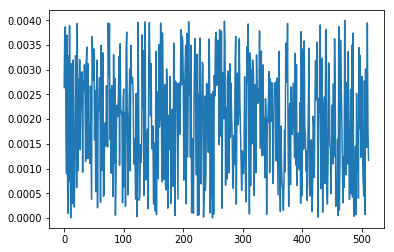

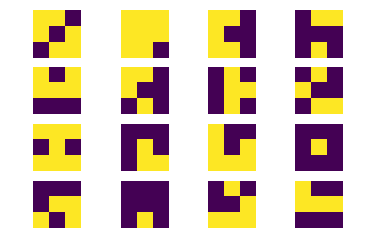

In [27]:
size = (4, 4)
geometry = (3,3)
hndim = 2**np.prod(geometry)
pl2 = np.random.random(hndim); pl2 /= pl2.sum()

plt.plot(pl2)
plt.show()

# generate samples
indices = np.random.choice(np.arange(hndim), np.prod(size), p = pl2)
samples = binary_basis(geometry)[indices]

plot_bs(samples, size)

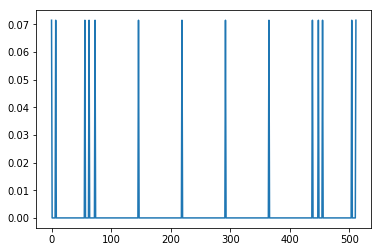

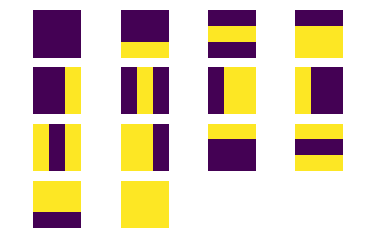

In [28]:
geometry = (3,3)
pl2 = barstripe_pdf(geometry)
plt.plot(pl2)
plt.show()

# generate samples
samples = binary_basis(geometry)[pl2>1e-2]

size = (4, 4)
plot_bs(samples, size)